# 資料擴增: 透視變換(Perspective Transformation)

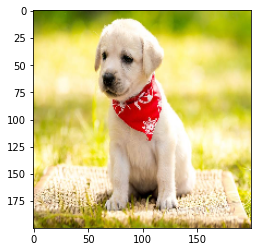

In [10]:
import PIL.Image as Image
import cv2
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import warnings
from torchvision import transforms
from torchvision.transforms import functional as TF
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
imagepath='./image/dog.png'

# read image with PIL module

img = cv2.imread(imagepath)
img = cv2.resize(img, (200, 200))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# cv2.imshow('',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

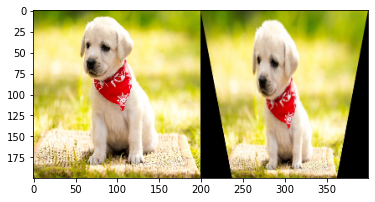

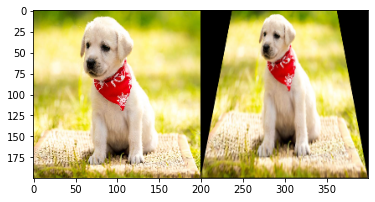

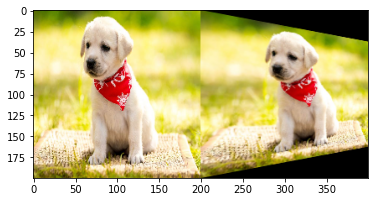

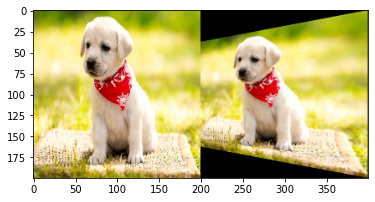

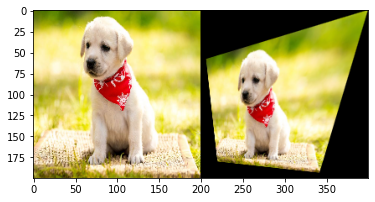

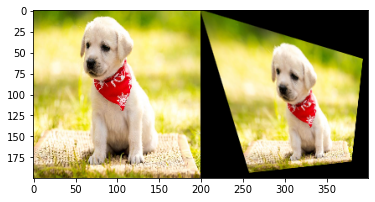

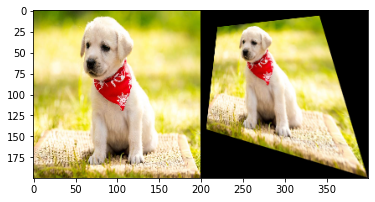

In [14]:
h,w,ch = img.shape

new_top_left=[0, 0]
new_top_right=[w, 0]
new_down_left=[0, h]
new_down_right=[w, h]
pts2 = np.float32([new_top_left, new_top_right, new_down_left, new_down_right])


w_distorationRatio = -0.3
h_distorationRatio = -0.3

ratio_w = 1 - w_distorationRatio
ratio_h = 1 - h_distorationRatio

for view_angle in range(7):
    if view_angle==0: # 向下翻
        top_left   = [0, 0]
        top_right  = [ w, 0]
        down_left  = [int(w*(1-ratio_w)), h ]
        down_right = [int(w*ratio_w), h]
    elif view_angle==1: # 向上翻
        top_left   = [int(w*(1-ratio_w)),0]
        top_right  = [ int(w*ratio_w), 0]
        down_left  = [0, h ]
        down_right = [w, h]
    elif view_angle==2: # 向左翻
        top_left   = [0, 0]
        top_right  = [ w, int(h * (1- ratio_h))]
        down_left  = [0, h ]
        down_right = [w, int(h * ratio_h)]         
    elif view_angle==3: # 向右翻
        top_left   = [0, int(h*(1-ratio_h))]
        top_right  = [ w, 0]
        down_left  = [0, int(h*ratio_h)]
        down_right = [w, h] 

    elif view_angle==4: # 向下右翻
        top_left=[0,int(h*(1-ratio_h))]
        top_right=[ w, 0]
        down_left=[int(w*(1-ratio_w)), int(h*ratio_h) ]
        down_right=[int(w*ratio_w), h] 
    elif view_angle==5: # 向下左翻
        top_left   = [0, 0]
        top_right  = [ w, int(h * (1- ratio_h))]
        down_left  = [int(w*(1-ratio_w)), h ]
        down_right = [int(w*ratio_w), int(h * ratio_h)]
    elif view_angle==6: # 向上右翻
        top_left   = [int(w*(1-ratio_w)),int(h*(1-ratio_h))]
        top_right  = [ int(w*ratio_w), 0]
        down_left  = [0, int(h*ratio_h)]
        down_right = [w, h]    
    elif view_angle==7: # 向上左翻    
        top_left   = [int(w*(1-ratio_w)),0]
        top_right  = [ int(w*ratio_w), int(h * (1- ratio_h))]
        down_left  = [0, h ]
        down_right = [w, int(h * ratio_h)]


    pts1 = np.float32([top_left, top_right, down_left, down_right])
    M = cv2.getPerspectiveTransform(pts1, pts2)
    dst = cv2.warpPerspective(img, M, (w,h), cv2.INTER_LINEAR)
    vis = np.concatenate((img, dst), axis=1)


    plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
    plt.show()

# cv2.imshow('',vis)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
